In [15]:
import numpy as np

In [16]:

# idx 형식 파일 읽기 함수
def load_idx_file(filename):
    with open(filename, 'rb') as f:
        # 파일 헤더 부분 읽기
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        if magic_number == 2051:  # 이미지 파일
            num_images = int.from_bytes(f.read(4), byteorder='big')
            rows = int.from_bytes(f.read(4), byteorder='big')
            cols = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
        elif magic_number == 2049:  # 레이블 파일
            num_labels = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError(f"파일 형식이 잘못되었습니다: {filename}")
    return data



In [17]:
# 데이터 로드
X_train = load_idx_file('train-images.idx3-ubyte')
y_train = load_idx_file('train-labels.idx1-ubyte')
X_test = load_idx_file('t10k-images.idx3-ubyte')
y_test = load_idx_file('t10k-labels.idx1-ubyte')

In [18]:
# 원-핫 인코딩 함수
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [19]:
# 데이터 전처리
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)


In [20]:
# 초기화
input_size = 784  # 입력층 노드 수
hidden_layer1_size = 50  # 첫 번째 은닉층 노드 수
hidden_layer2_size = 100  # 두 번째 은닉층 노드 수
output_size = 10  # 출력층 노드 수
learning_rate = 0.1  # 학습률
epochs = 1000 # 학습 에폭 수

In [22]:
# 가중치 초기화 변경
w1 = np.random.randn(input_size, hidden_layer1_size) * np.sqrt(2. / input_size)
w2 = np.random.randn(hidden_layer1_size, hidden_layer2_size) * np.sqrt(2. / hidden_layer1_size)
w3 = np.random.randn(hidden_layer2_size, output_size) * np.sqrt(2. / hidden_layer2_size)
b1 = np.zeros((1, hidden_layer1_size))
b2 = np.zeros((1, hidden_layer2_size))
b3 = np.zeros((1, output_size))

In [24]:
# 시그모이드 함수와 그 미분 함수 (relu가 더 좋아서 사용안함)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 소프트맥스 함수
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 손실 함수 (크로스 엔트로피)
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))


In [25]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


In [26]:
# 학습
for epoch in range(epochs):
    # 시그모이드로 학습(사용안함)
    # 순전파
    # z1 = np.dot(X_train, w1) + b1
    # a1 = sigmoid(z1)
    # z2 = np.dot(a1, w2) + b2
    # a2 = sigmoid(z2)
    # z3 = np.dot(a2, w3) + b3
    # a3 = softmax(z3)

    # # 손실 계산
    # loss = cross_entropy_loss(y_train_encoded, a3)

    # # 역전파
    # dL_da3 = a3 - y_train_encoded
    # dL_dw3 = np.dot(a2.T, dL_da3) / X_train.shape[0]
    # dL_db3 = np.sum(dL_da3, axis=0, keepdims=True) / X_train.shape[0]

    # dL_da2 = np.dot(dL_da3, w3.T) * sigmoid_derivative(a2)
    # dL_dw2 = np.dot(a1.T, dL_da2) / X_train.shape[0]
    # dL_db2 = np.sum(dL_da2, axis=0, keepdims=True) / X_train.shape[0]

    # dL_da1 = np.dot(dL_da2, w2.T) * sigmoid_derivative(a1)
    # dL_dw1 = np.dot(X_train.T, dL_da1) / X_train.shape[0]
    # dL_db1 = np.sum(dL_da1, axis=0, keepdims=True) / X_train.shape[0]
    
    # 순전파
    z1 = np.dot(X_train, w1) + b1
    a1 = relu(z1)  # ReLU 함수 사용
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)  # ReLU 함수 사용
    z3 = np.dot(a2, w3) + b3
    a3 = softmax(z3)
    # 손실 계산
    loss = cross_entropy_loss(y_train_encoded, a3)
    # 역전파
    dL_da3 = a3 - y_train_encoded
    dL_dw3 = np.dot(a2.T, dL_da3) / X_train.shape[0]
    dL_db3 = np.sum(dL_da3, axis=0, keepdims=True) / X_train.shape[0]

    dL_da2 = np.dot(dL_da3, w3.T) * relu_derivative(a2)  # ReLU 미분 사용
    dL_dw2 = np.dot(a1.T, dL_da2) / X_train.shape[0]
    dL_db2 = np.sum(dL_da2, axis=0, keepdims=True) / X_train.shape[0]

    dL_da1 = np.dot(dL_da2, w2.T) * relu_derivative(a1)  # ReLU 미분 사용
    dL_dw1 = np.dot(X_train.T, dL_da1) / X_train.shape[0]
    dL_db1 = np.sum(dL_da1, axis=0, keepdims=True) / X_train.shape[0]


    # 가중치 및 바이어스 업데이트
    w3 -= learning_rate * dL_dw3
    b3 -= learning_rate * dL_db3
    w2 -= learning_rate * dL_dw2
    b2 -= learning_rate * dL_db2
    w1 -= learning_rate * dL_dw1
    b1 -= learning_rate * dL_db1

    # 에폭마다 손실 출력
    #if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 2.3523
Epoch 1, Loss: 2.2247
Epoch 2, Loss: 2.1382
Epoch 3, Loss: 2.0558
Epoch 4, Loss: 1.9707
Epoch 5, Loss: 1.8814
Epoch 6, Loss: 1.7896
Epoch 7, Loss: 1.6969
Epoch 8, Loss: 1.6056
Epoch 9, Loss: 1.5178
Epoch 10, Loss: 1.4346
Epoch 11, Loss: 1.3568
Epoch 12, Loss: 1.2846
Epoch 13, Loss: 1.2181
Epoch 14, Loss: 1.1570
Epoch 15, Loss: 1.1013
Epoch 16, Loss: 1.0505
Epoch 17, Loss: 1.0043
Epoch 18, Loss: 0.9623
Epoch 19, Loss: 0.9241
Epoch 20, Loss: 0.8894
Epoch 21, Loss: 0.8577
Epoch 22, Loss: 0.8289
Epoch 23, Loss: 0.8025
Epoch 24, Loss: 0.7782
Epoch 25, Loss: 0.7560
Epoch 26, Loss: 0.7354
Epoch 27, Loss: 0.7165
Epoch 28, Loss: 0.6989
Epoch 29, Loss: 0.6826
Epoch 30, Loss: 0.6675
Epoch 31, Loss: 0.6533
Epoch 32, Loss: 0.6401
Epoch 33, Loss: 0.6277
Epoch 34, Loss: 0.6161
Epoch 35, Loss: 0.6052
Epoch 36, Loss: 0.5950
Epoch 37, Loss: 0.5853
Epoch 38, Loss: 0.5761
Epoch 39, Loss: 0.5675
Epoch 40, Loss: 0.5592
Epoch 41, Loss: 0.5515
Epoch 42, Loss: 0.5441
Epoch 43, Loss: 0.537

In [33]:
# 모델 평가
def evaluate(X, y_true):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = relu(z3)

    predictions = np.argmax(a3, axis=1)
    accuracy = np.mean(predictions == np.argmax(y_true, axis=1))
    return accuracy

train_accuracy = evaluate(X_train, y_train_encoded)
test_accuracy = evaluate(X_test, y_test_encoded)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9553, Test Accuracy: 0.9518


여기서 부터는 제가 개인적으로 궁금해서 예시 그림이랑 모델이 예측한 값이 맞는 지 확인하는 코드입니다.
사진을 출력하기 위해 matplotlib을 import했습니다.

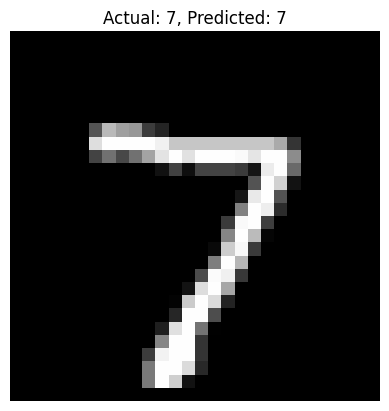

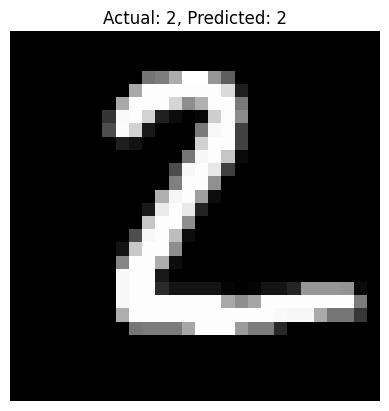

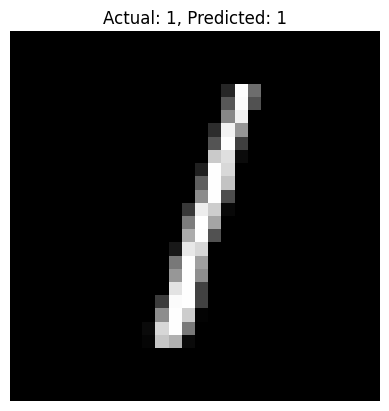

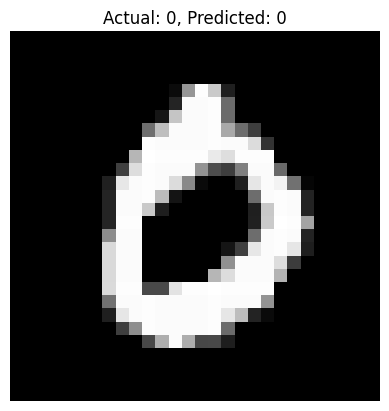

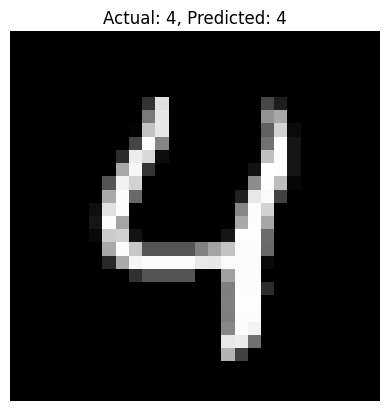

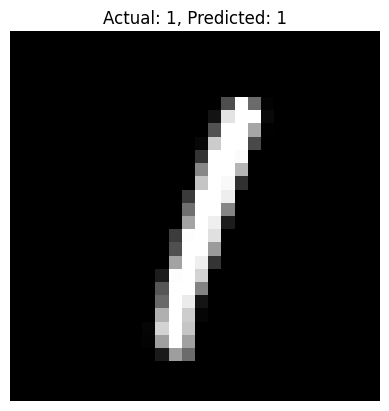

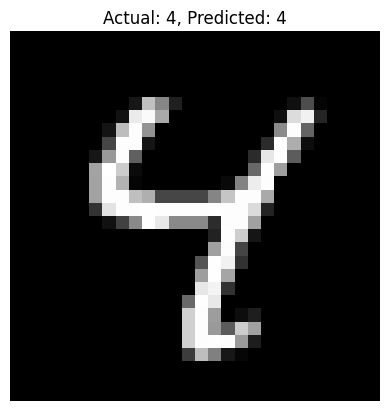

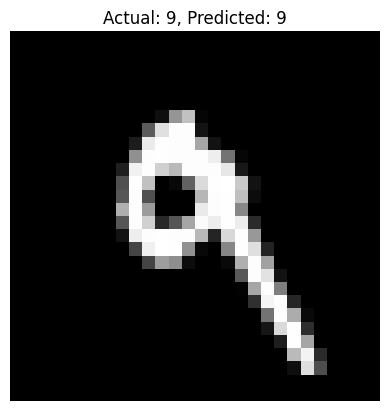

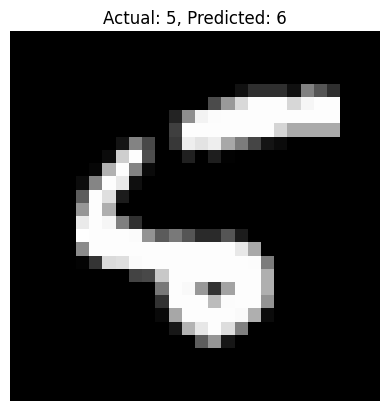

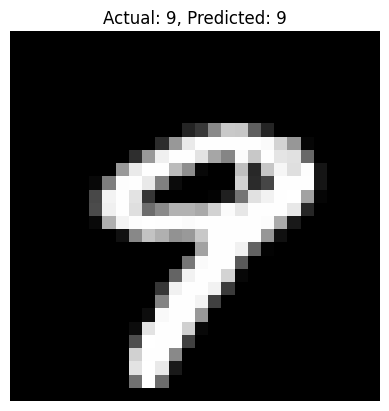

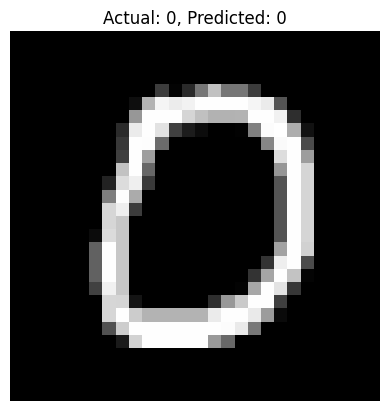

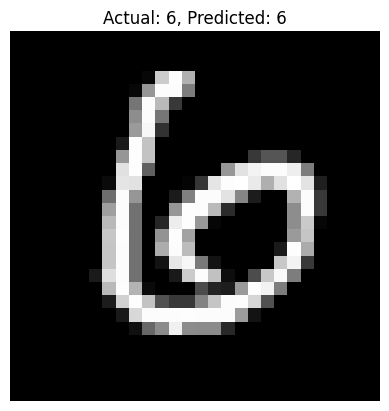

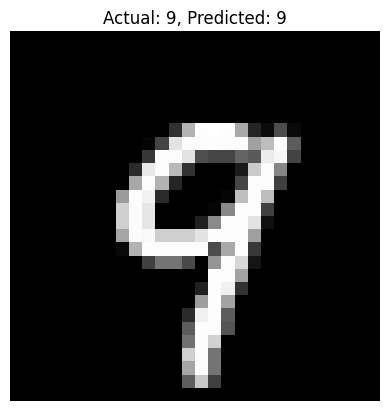

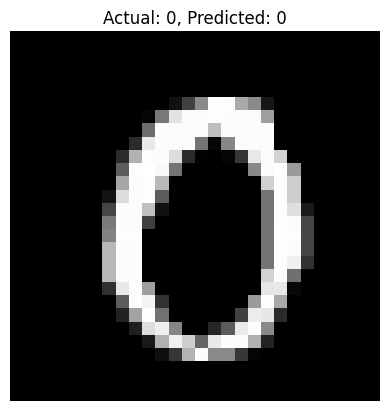

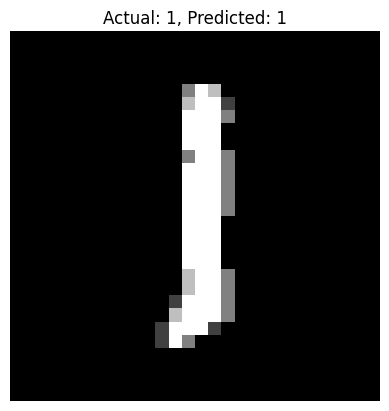

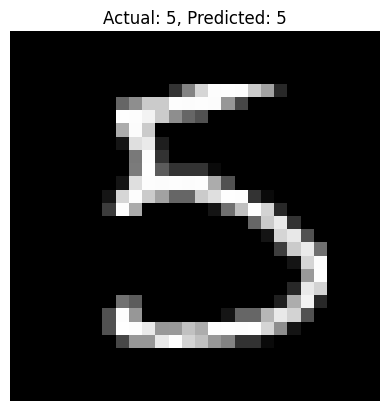

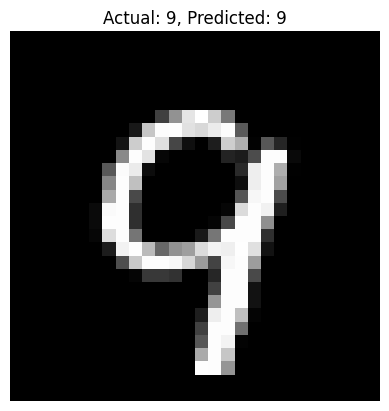

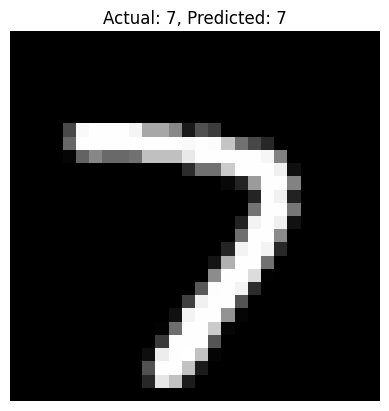

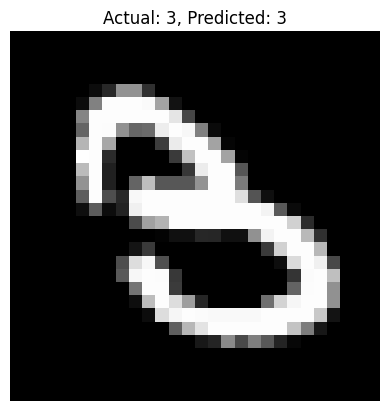

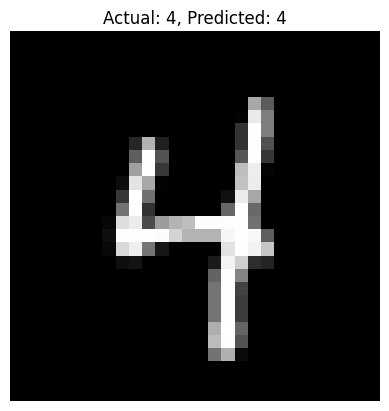

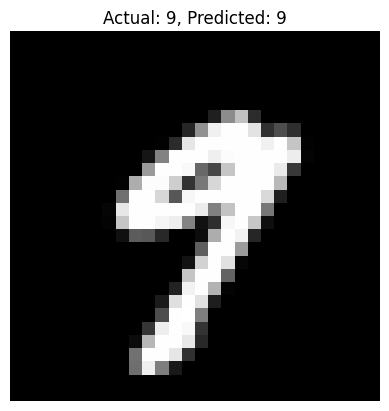

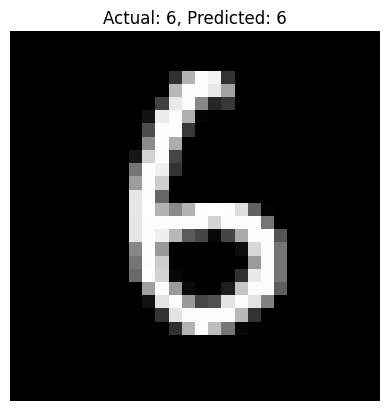

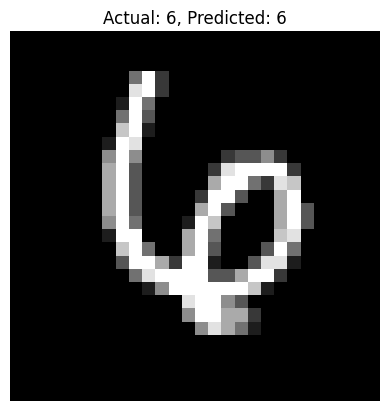

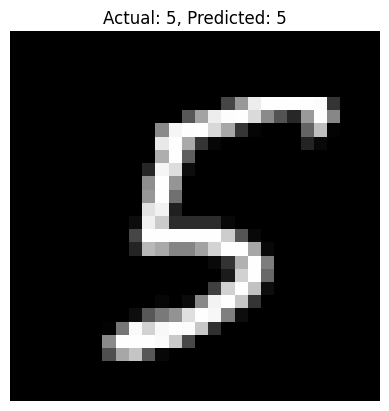

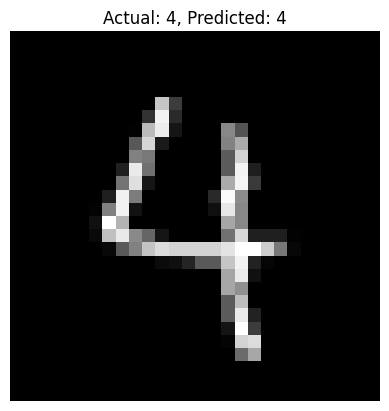

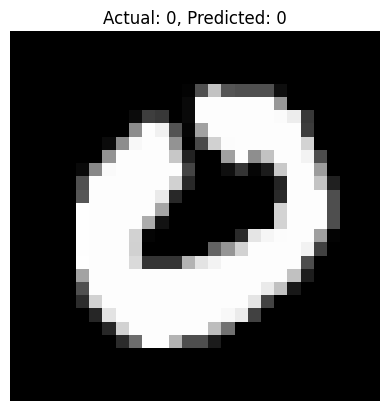

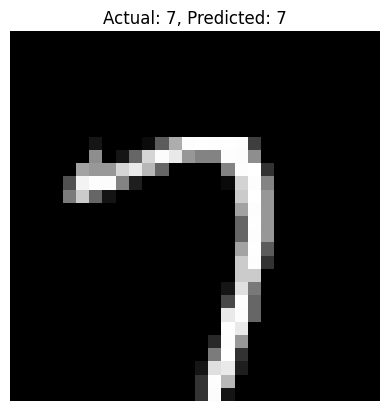

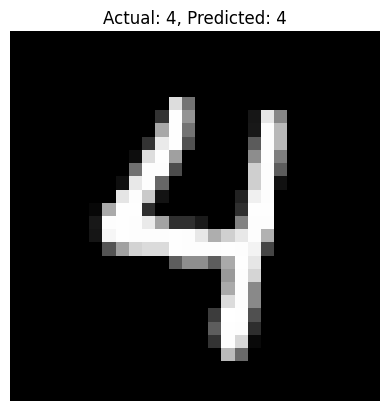

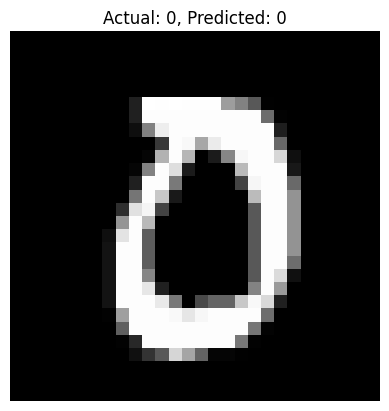

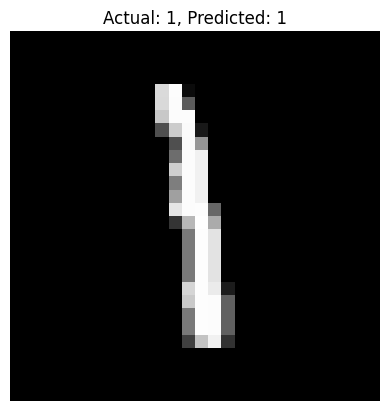

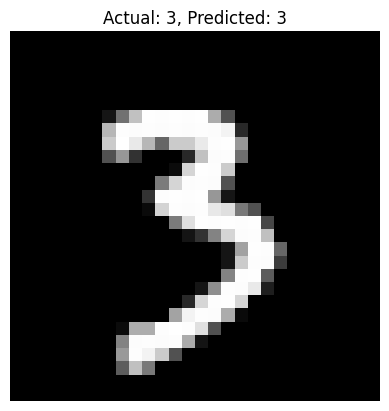

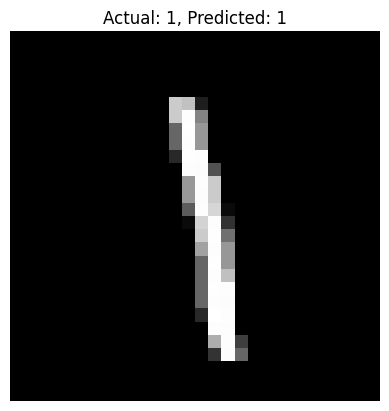

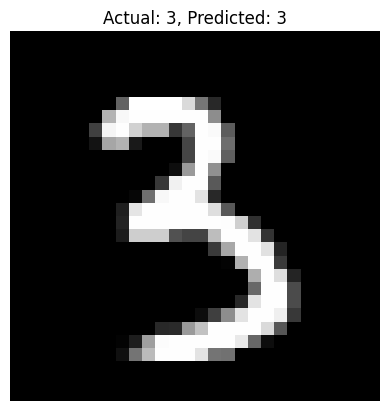

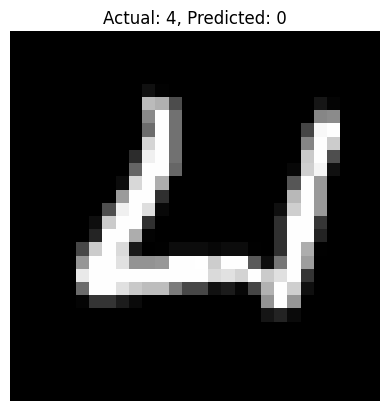

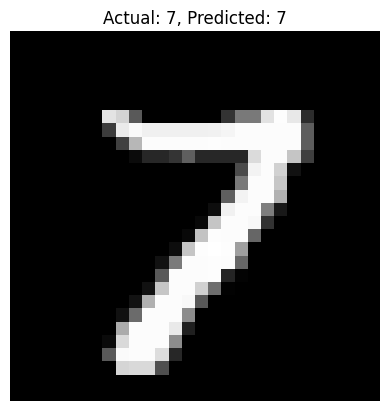

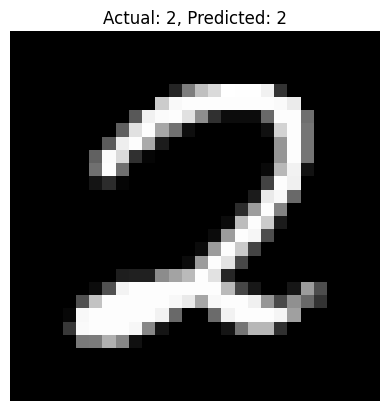

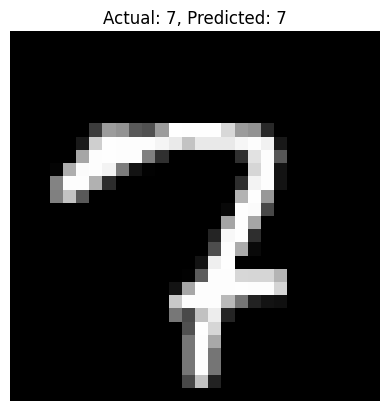

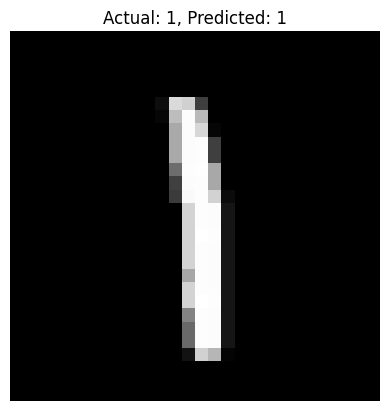

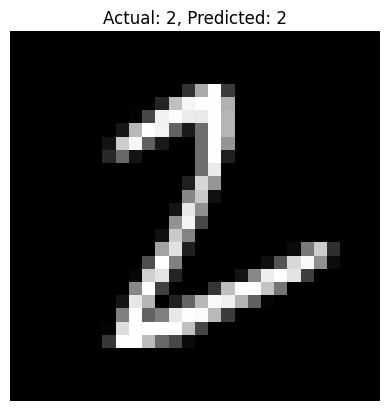

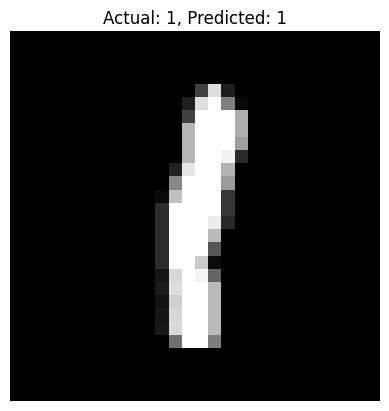

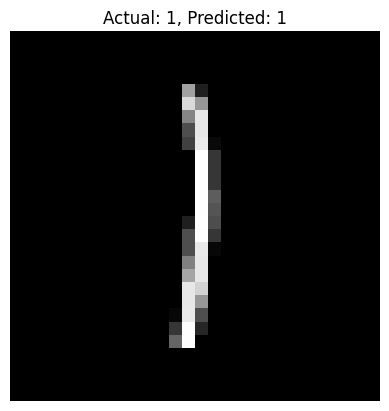

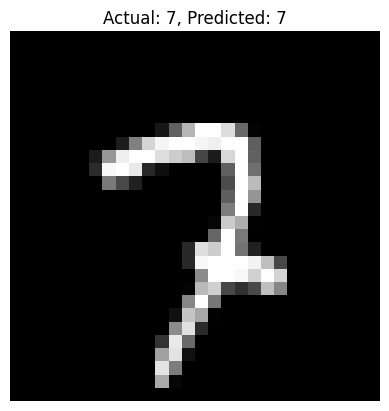

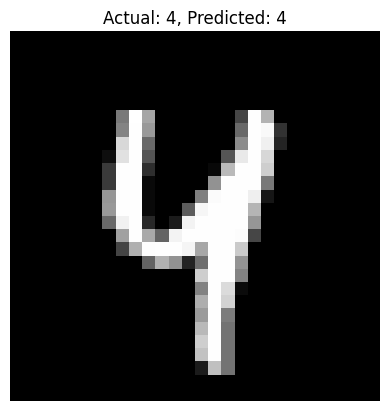

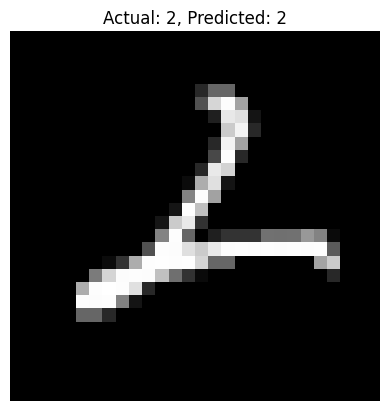

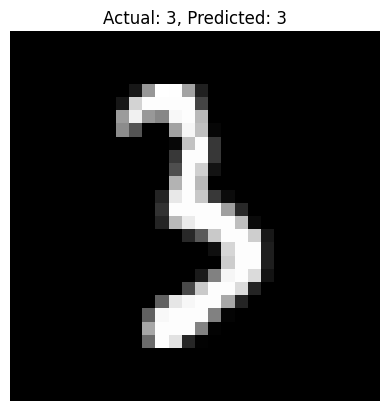

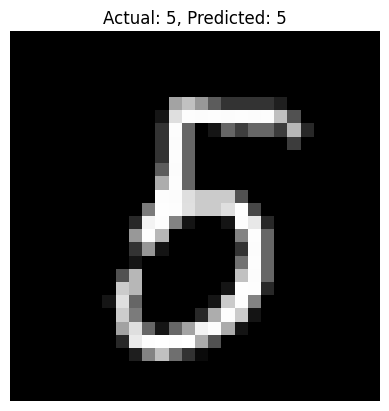

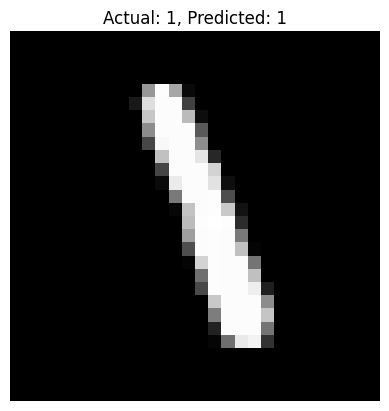

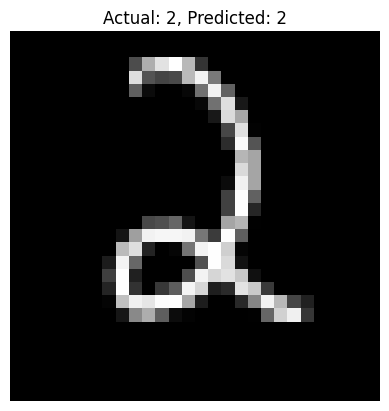

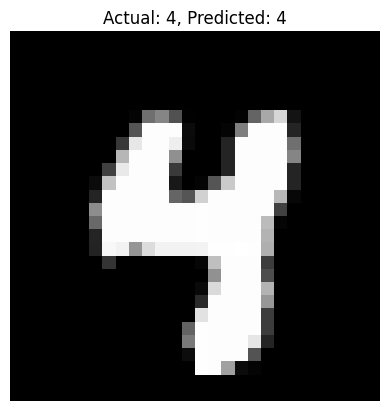

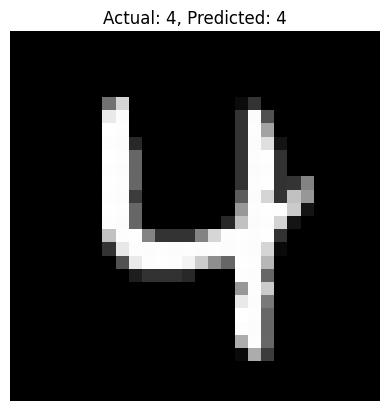

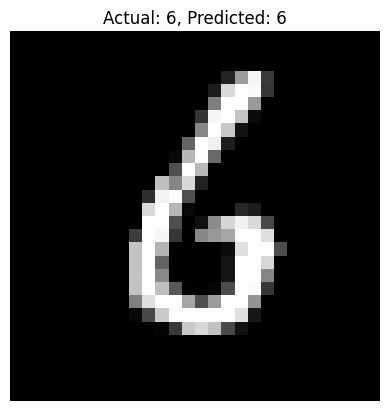

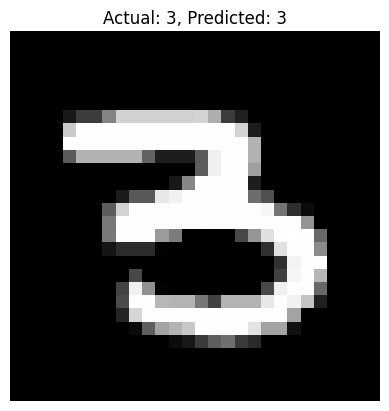

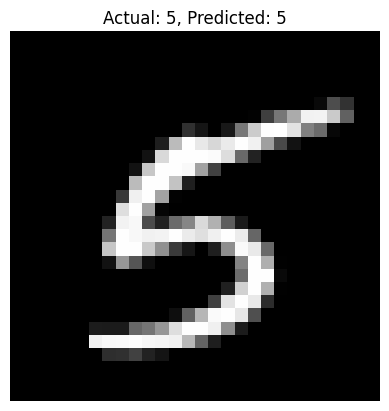

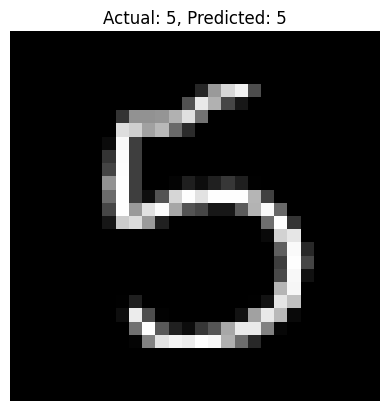

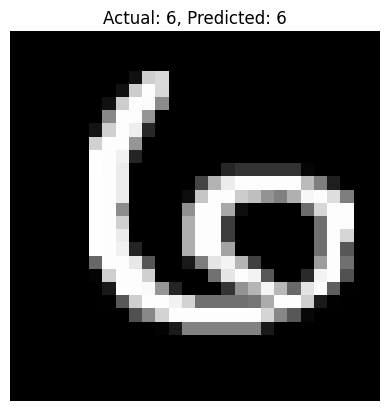

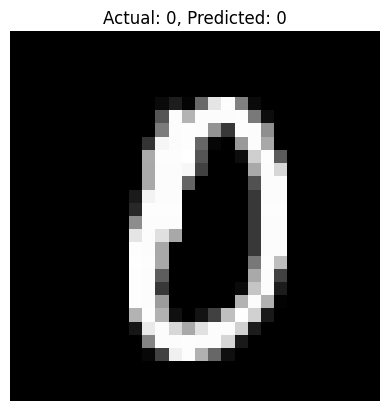

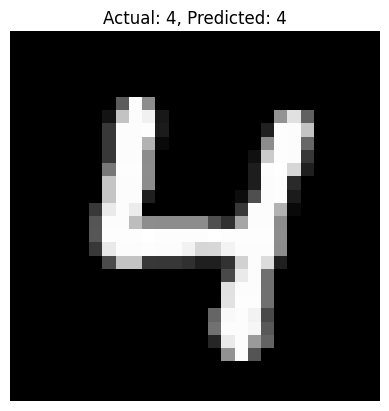

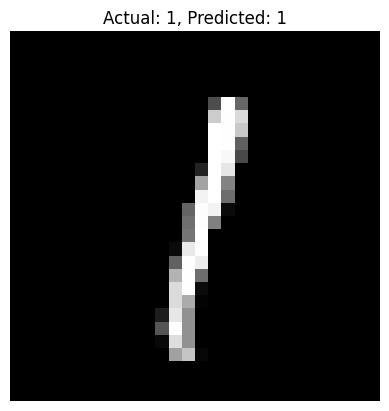

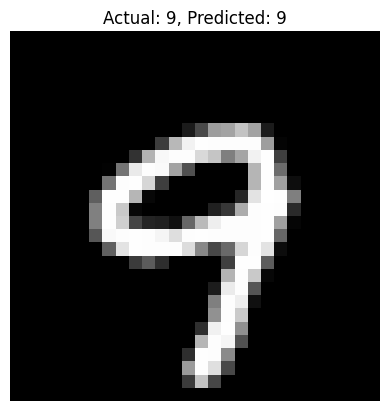

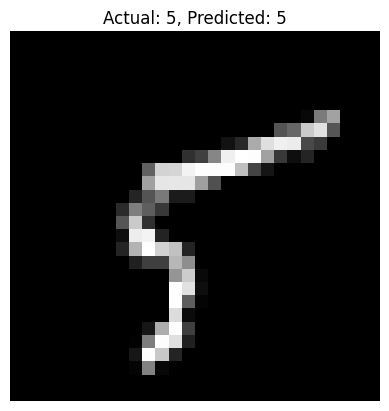

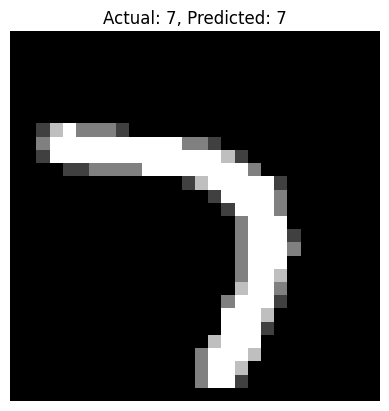

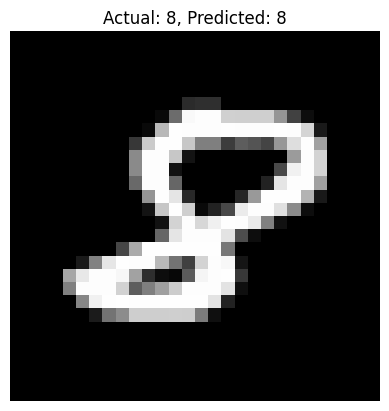

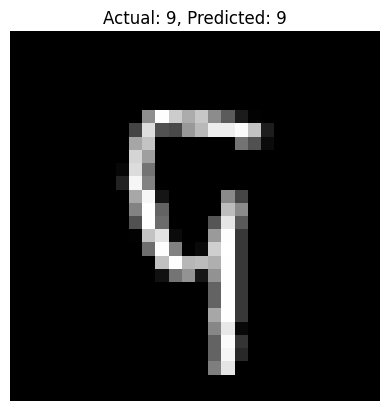

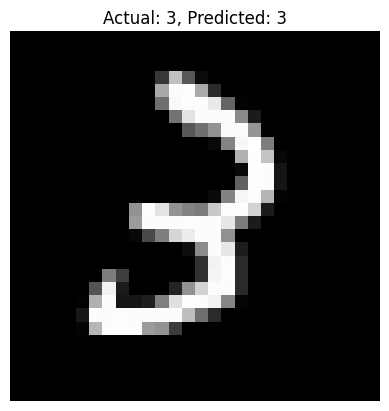

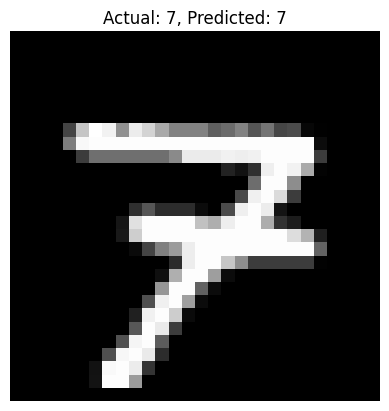

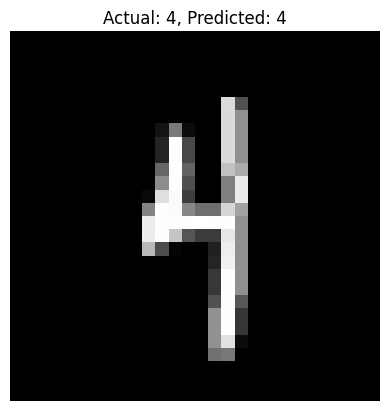

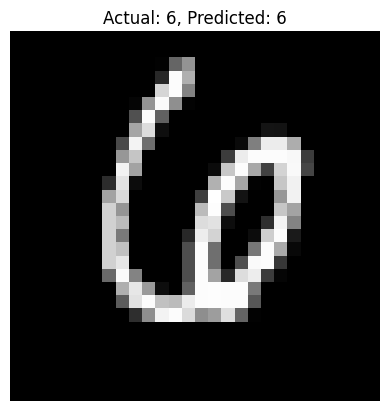

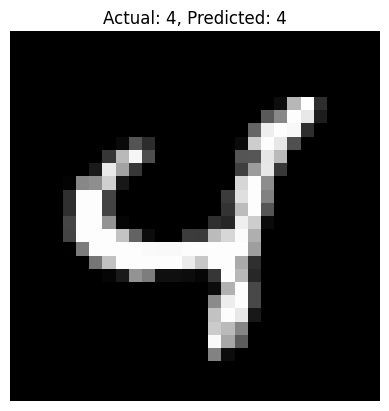

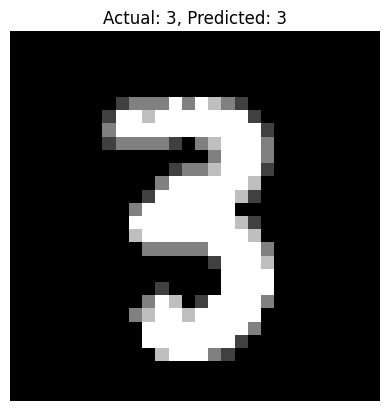

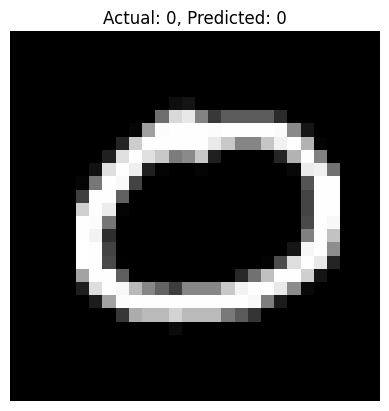

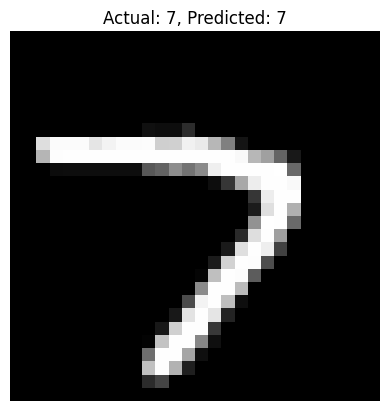

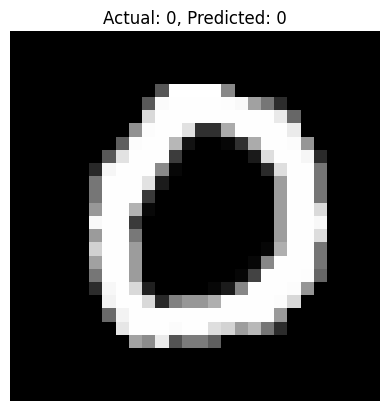

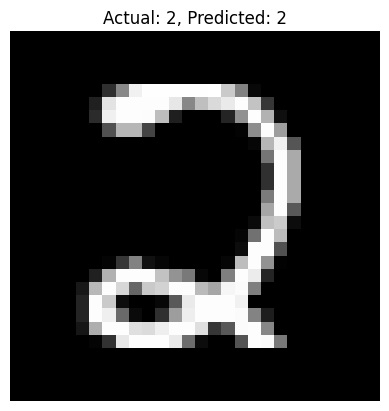

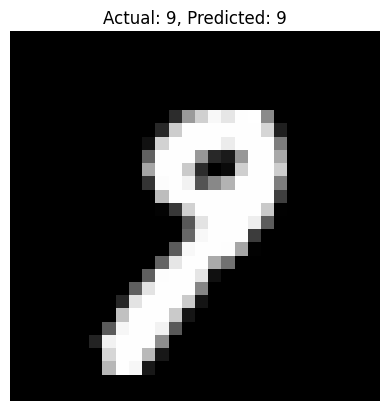

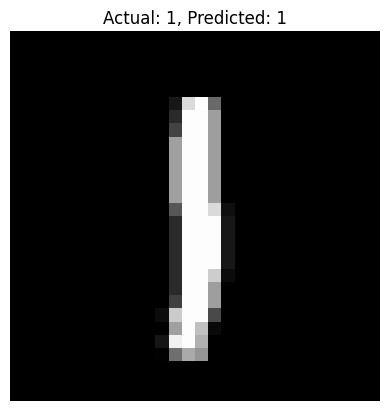

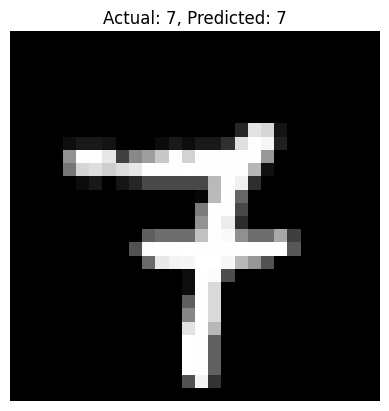

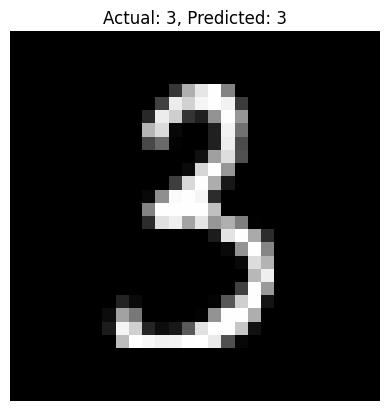

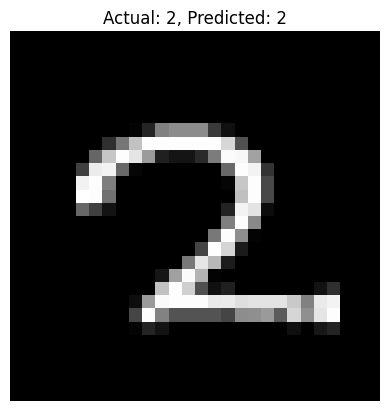

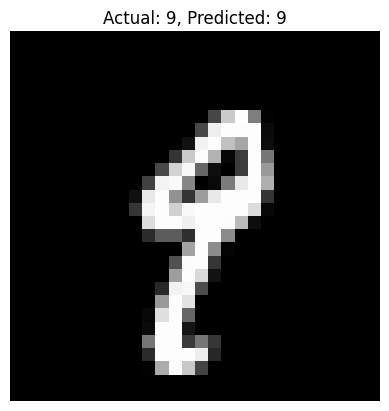

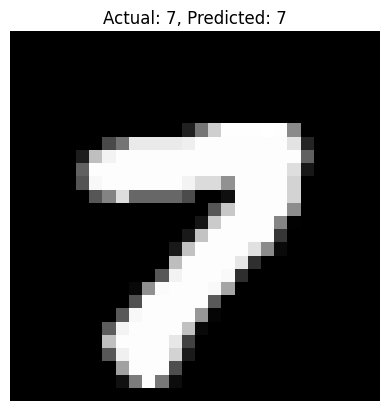

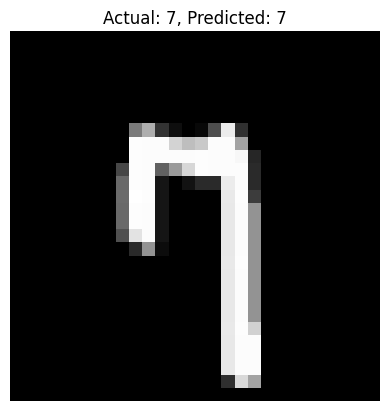

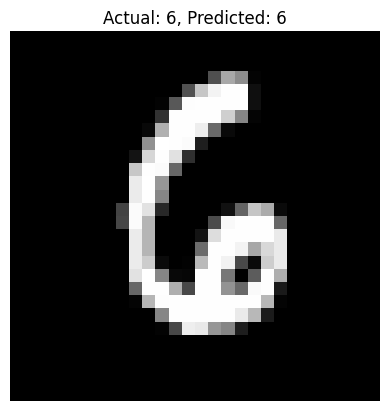

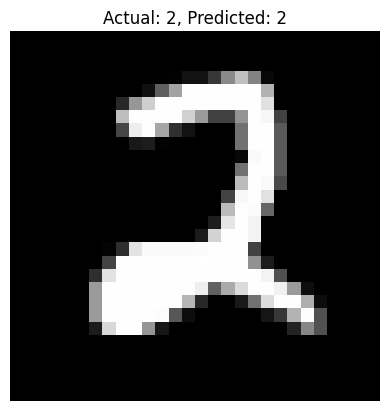

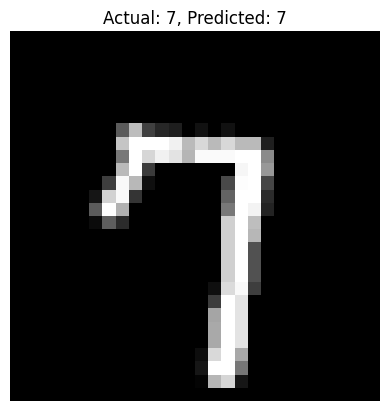

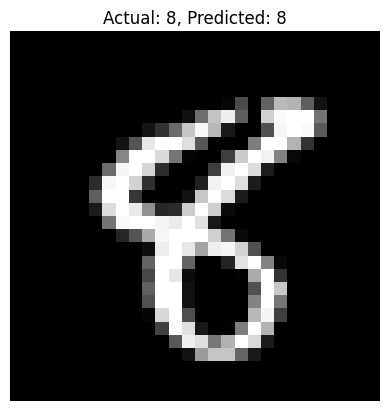

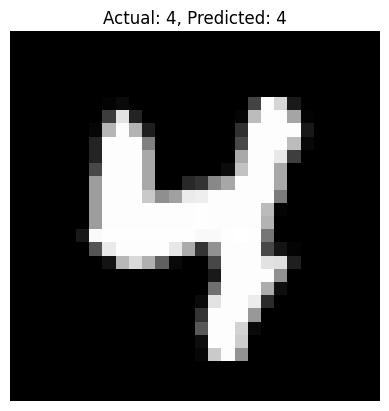

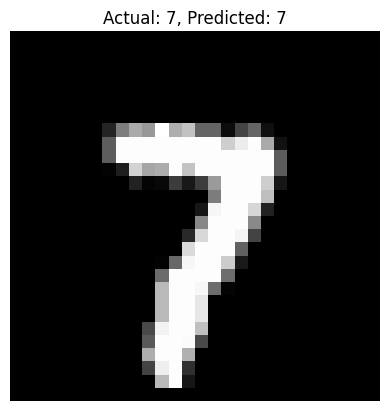

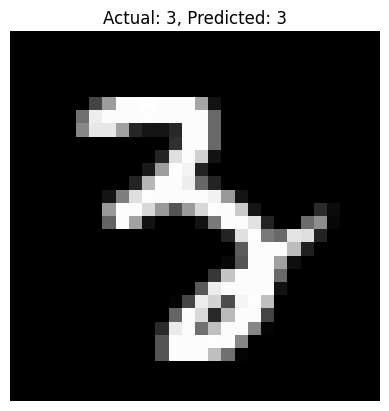

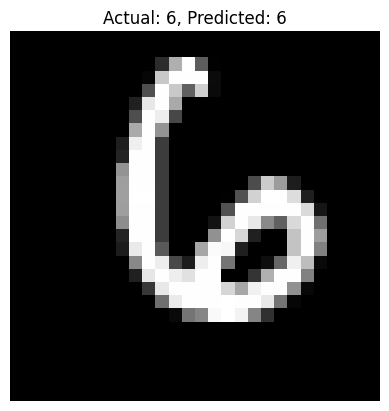

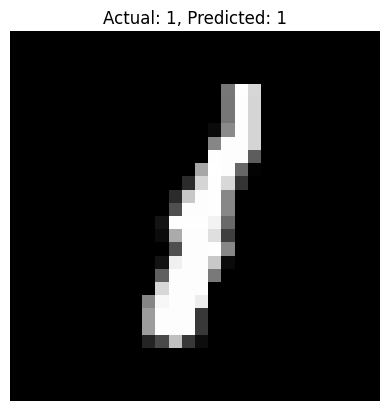

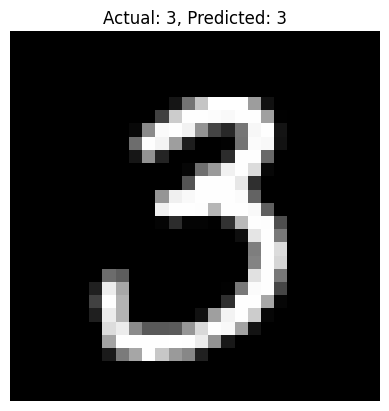

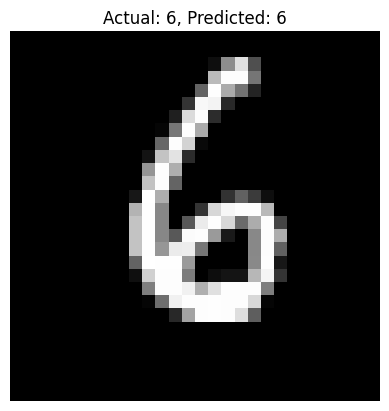

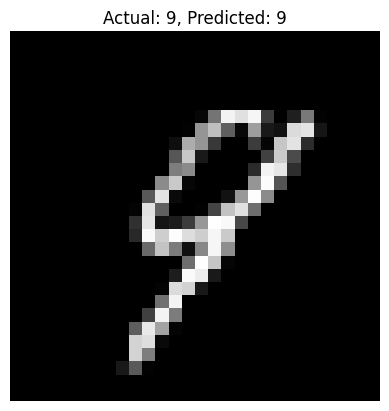

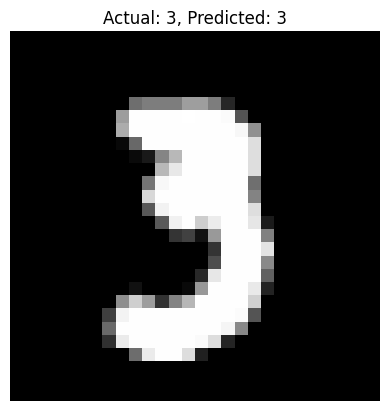

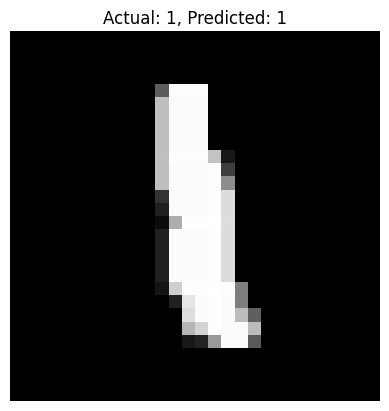

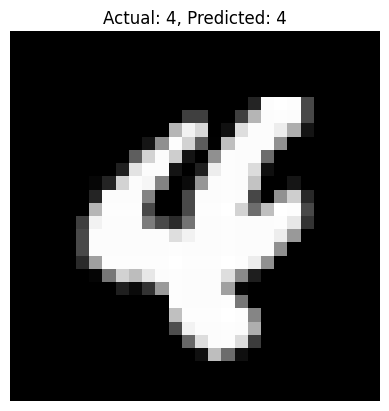

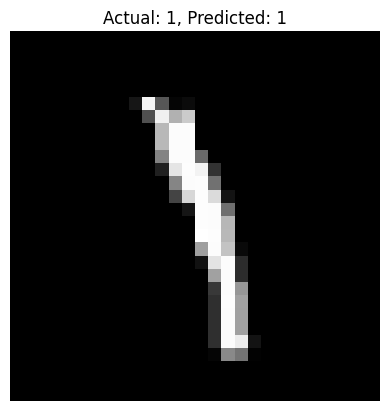

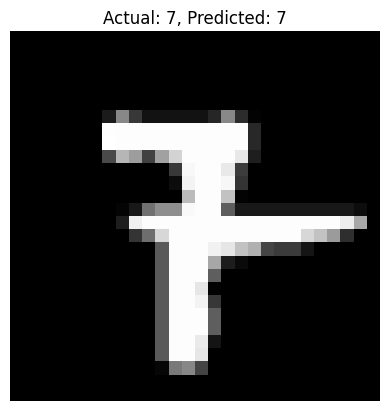

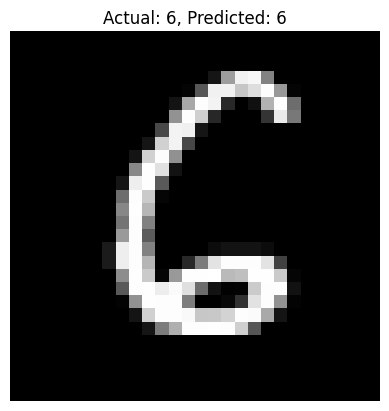

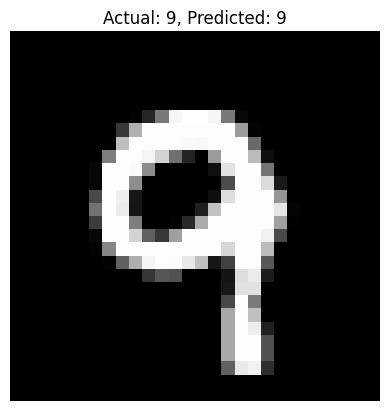

In [32]:
import matplotlib.pyplot as plt  # 추가: 시각화를 위해 matplotlib를 임포트합니다.
def show_example_prediction(index):
    # 입력 이미지
    example_image = X_test[index].reshape(28, 28)  # 28x28 이미지로 변환

    # 모델 예측
    z1 = np.dot(X_test[index].reshape(1, -1), w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = softmax(z3)
    
    predicted_label = np.argmax(a3)

    # 실제 레이블
    actual_label = np.argmax(y_test_encoded[index])
    # 이미지와 예측 결과를 출력
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# 예시 이미지 보기 (예: 첫 번째 테스트 이미지)
for idx in range(100):
    show_example_prediction(idx)